<a href="https://colab.research.google.com/github/thitiwasttn/machine_learning/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [274]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [275]:
df = pd.read_csv('/content/gdp4c.csv', index_col=0)
print(df.shape)
print(df.head())

(58, 4)
              SGP           THA           USA  VNM
1960  704462302.4  2.760747e+09  5.433000e+11  NaN
1961  764308114.5  3.034044e+09  5.633000e+11  NaN
1962  825885273.7  3.308913e+09  6.051000e+11  NaN
1963  917222004.4  3.540403e+09  6.386000e+11  NaN
1964  893734483.2  3.889130e+09  6.858000e+11  NaN


check mission data

In [276]:
df.isnull().sum()
# got 25 rows

SGP     0
THA     0
USA     0
VNM    25
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'GDP')

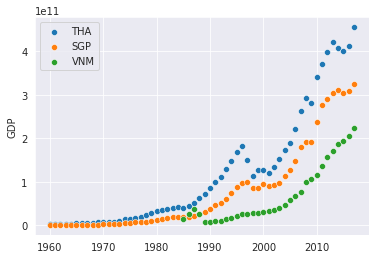

In [277]:
sns.set_style('darkgrid')
sns.scatterplot(df.index, df['THA'], label='THA')
sns.scatterplot(df.index, df['SGP'], label='SGP')
sns.scatterplot(df.index, df['VNM'], label='VNM')
plt.ylabel('GDP')

In [278]:
X = df.index.values.reshape(-1,1)
y = df['THA']
print(X[:5])
print(y[:5])

[[1960]
 [1961]
 [1962]
 [1963]
 [1964]]
1960    2.760747e+09
1961    3.034044e+09
1962    3.308913e+09
1963    3.540403e+09
1964    3.889130e+09
Name: THA, dtype: float64


In [279]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

ลองแบบ Liner regression

In [280]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

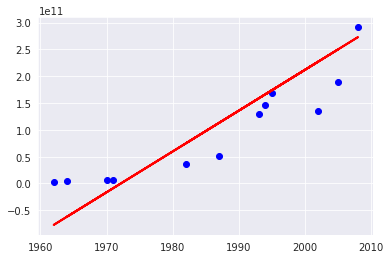

In [281]:
y_predic = model.predict(X_test)
plt.scatter(X_test, y_test, color='b')
plt.plot(X_test, y_predic, linewidth='2', color='r')
plt.show()

In [282]:
model.score(X_test, y_test)

0.6757586826003501

คลาดเคลื่อนเยอะ

ทายว่าปี 2020 จะมี GDP เท่าไหร่

In [283]:
y_predic = model.predict([[2020]])
print('{:,.6E}'.format(y_predic[0]))

3.644483E+11


2015

In [284]:
y_predic = model.predict([[2015]])
print('{:,.6E}'.format(y_predic[0]))
print('in dataset')
print((df[df.index == 2015].THA))

3.263705E+11
in dataset
2015    4.013990e+11
Name: THA, dtype: float64


predict ด้วย polynomial regression

In [285]:
from sklearn.preprocessing import PolynomialFeatures

กำหนดรายละเอียดของ Polynomial ว่าจะเอา Degree ยกกำลังสูงสุดเท่าใด ในตอนนี้เริ่มต้น ทดลองยกกำลังสองก่อน จากนั้นทำการ fit transform เปลี่ยนค่า x ให้เป็น poly แล้วทำการสร้าง model ด้วย fit (คร่าวๆ คือ degree=2 หักโค้งได้ 1 ครั้ง degree=3 หักโค้งได้ 2 ครั้ง degree=4 หักโค้งได้ 3 ... ลองเสร็จแล้วทดลอง degree=3 หรือ degree=4 ต่อไป)

In [286]:

poly_features = PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

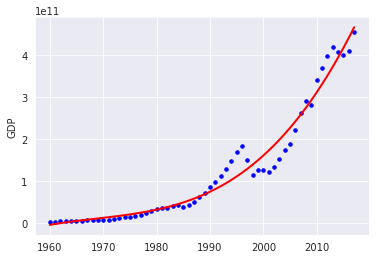

In [287]:
y_poly_pred = model.predict(x_poly)

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = 6,4  

plt.scatter(x, y, color='b',s=12) 
plt.plot(x, y_poly_pred, linewidth='2', color='r') 
plt.ylabel('GDP')

plt.show()

score

In [288]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print('R2 = {:.5f} '.format(model.score(x_poly, y)))
print('R2 = {:.5f} '.format(r2_score(y, y_poly_pred)))

print('MSE = {:.4e} '.format(mean_squared_error(y, y_poly_pred)))
print('RMSE = {:.4e} '.format(np.sqrt(mean_squared_error(y,  y_poly_pred))))

R2 = 0.96689 
R2 = 0.96689 
MSE = 5.9633e+20 
RMSE = 2.4420e+10 


In [291]:
x_input = [[2000],[2015]]
y_poly_pred = model.predict(poly_features.fit_transform(x_input))
y_poly_pred

for val in y_poly_pred:
    print('{:.4e}'.format(val))
print('in dataset')
print((df[df.index == 2015].THA))


1.6095e+11
4.1842e+11
in dataset
2015    4.013990e+11
Name: THA, dtype: float64
